## Data Cleaning & Visualization for Food Listing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/raw/food_listings_data.csv")

## Dataset First Look

In [5]:
df.head()

,Food_ID,Food_Name,Quantity,Expiry_Date,Provider_ID,Provider_Type,Location,Food_Type,Meal_Type
0,1,Bread,43,3/17/2025,110,Grocery Store,South Kellyville,Non-Vegetarian,Breakfast
1,2,Soup,22,3/24/2025,791,Grocery Store,West James,Non-Vegetarian,Dinner
2,3,Fruits,46,3/28/2025,478,Catering Service,Lake Regina,Vegan,Breakfast
3,4,Fruits,15,3/16/2025,930,Restaurant,Kellytown,Vegan,Lunch
4,5,Soup,14,3/19/2025,279,Restaurant,Garciaport,Vegan,Dinner


## Remove any extra spaces

In [7]:
df.columns = df.columns.str.strip()

## Strip spaces in string columns

In [8]:
str_cols = df.select_dtypes(include='object').columns
df[str_cols] = df[str_cols].apply(lambda col: col.str.strip())

## Standardize categorical values

In [9]:
df['Provider_Type'] = df['Provider_Type'].str.title()       
df['Location'] = df['Location'].str.title()
df['Food_Type'] = df['Food_Type'].str.capitalize()          
df['Meal_Type'] = df['Meal_Type'].str.capitalize()

## Parse Expiry_Date to datetime

In [10]:
df['Expiry_Date'] = pd.to_datetime(df['Expiry_Date'], errors='coerce', dayfirst=False)

## Remove unrealistic quantities

In [11]:
df = df[df['Quantity'] > 0]

In [12]:
df

,Food_ID,Food_Name,Quantity,Expiry_Date,Provider_ID,Provider_Type,Location,Food_Type,Meal_Type
0,1,Bread,43,2025-03-17,110,Grocery Store,South Kellyville,Non-vegetarian,Breakfast
1,2,Soup,22,2025-03-24,791,Grocery Store,West James,Non-vegetarian,Dinner
2,3,Fruits,46,2025-03-28,478,Catering Service,Lake Regina,Vegan,Breakfast
3,4,Fruits,15,2025-03-16,930,Restaurant,Kellytown,Vegan,Lunch
4,5,Soup,14,2025-03-19,279,Restaurant,Garciaport,Vegan,Dinner
...,...,...,...,...,...,...,...,...,...
995,996,Fish,15,2025-03-30,467,Catering Service,Phillipsfort,Vegan,Breakfast
996,997,Fish,22,2025-03-18,35,Grocery Store,Andersonmouth,Vegetarian,Breakfast
997,998,Fruits,6,2025-03-22,444,Restaurant,New Billy,Non-vegetarian,Dinner
998,999,Pasta,15,2025-03-30,702,Supermarket,Lake Mistyton,Non-vegetarian,Lunch


# Feature Engineering

## Days until expiry

In [13]:
today = pd.Timestamp.today().normalize()
df['Days_To_Expiry'] = (df['Expiry_Date'] - today).dt.days

## Expired flag

In [14]:
df['Is_Expired'] = df['Days_To_Expiry'] < 0

## Food category encoding (optional for ML later)

In [15]:
df['Meal_Type_Code'] = df['Meal_Type'].astype('category').cat.codes
df['Food_Type_Code'] = df['Food_Type'].astype('category').cat.codes

# EDA - Summaries

In [17]:
print("\n--- Dataset Summary ---")
print(df.info())


--- Dataset Summary ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Food_ID         1000 non-null   int64         
 1   Food_Name       1000 non-null   object        
 2   Quantity        1000 non-null   int64         
 3   Expiry_Date     1000 non-null   datetime64[ns]
 4   Provider_ID     1000 non-null   int64         
 5   Provider_Type   1000 non-null   object        
 6   Location        1000 non-null   object        
 7   Food_Type       1000 non-null   object        
 8   Meal_Type       1000 non-null   object        
 9   Days_To_Expiry  1000 non-null   int64         
 10  Is_Expired      1000 non-null   bool          
 11  Meal_Type_Code  1000 non-null   int8          
 12  Food_Type_Code  1000 non-null   int8          
dtypes: bool(1), datetime64[ns](1), int64(4), int8(2), object(5)
memory usage: 81.2+ KB
N

In [18]:
print("\n--- Descriptive Stats ---")
print(df.describe(include='all'))


--- Descriptive Stats ---
            Food_ID Food_Name     Quantity                 Expiry_Date  \
count   1000.000000      1000  1000.000000                        1000   
unique          NaN        10          NaN                         NaN   
top             NaN      Rice          NaN                         NaN   
freq            NaN       114          NaN                         NaN   
mean     500.500000       NaN    25.794000  2025-03-23 00:24:28.800000   
min        1.000000       NaN     1.000000         2025-03-16 00:00:00   
25%      250.750000       NaN    13.000000         2025-03-19 00:00:00   
50%      500.500000       NaN    26.000000         2025-03-23 00:00:00   
75%      750.250000       NaN    39.000000         2025-03-27 00:00:00   
max     1000.000000       NaN    50.000000         2025-03-30 00:00:00   
std      288.819436       NaN    14.609894                         NaN   

        Provider_ID Provider_Type   Location   Food_Type  Meal_Type  \
count      10

In [19]:
print("\nTop Provider Types:")
print(df['Provider_Type'].value_counts())


Top Provider Types:
Provider_Type
Supermarket         267
Restaurant          258
Grocery Store       243
Catering Service    232
Name: count, dtype: int64


In [20]:
print("\nFood Type Distribution:")
print(df['Food_Type'].value_counts())


Food Type Distribution:
Food_Type
Vegetarian        336
Vegan             334
Non-vegetarian    330
Name: count, dtype: int64


# EDA Visualization

In [21]:
sns.set(style="whitegrid")

## Quantity distribution

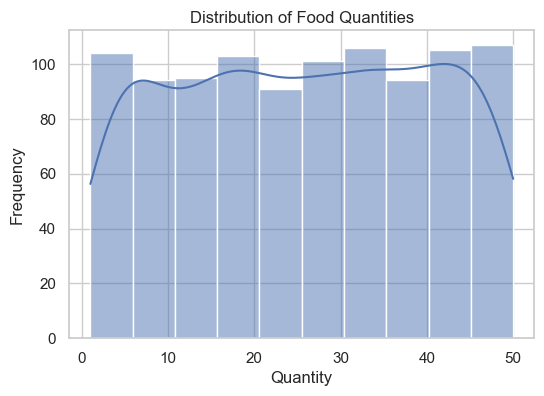

<Figure size 640x480 with 0 Axes>

In [22]:
plt.figure(figsize=(6,4))
sns.histplot(df['Quantity'], bins=10, kde=True)
plt.title("Distribution of Food Quantities")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()
plt.savefig('../reports/Visualizations/Food_Listing/Distribution of Food Quantities.png')

## Provider Type count

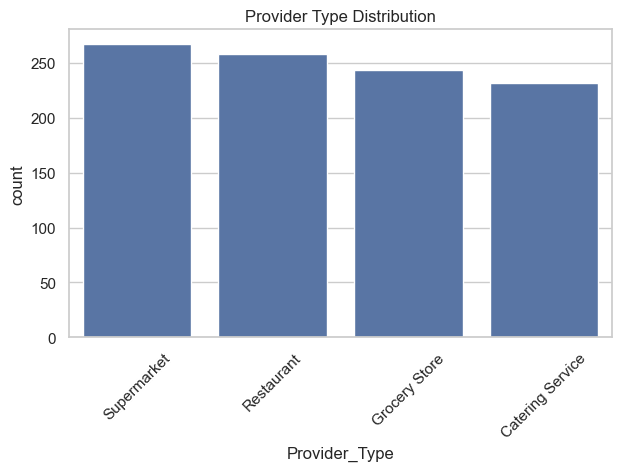

<Figure size 640x480 with 0 Axes>

In [23]:

plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Provider_Type', order=df['Provider_Type'].value_counts().index)
plt.title("Provider Type Distribution")
plt.xticks(rotation=45)
plt.show()
plt.savefig('../reports/Visualizations/Food_Listing/Provider Type Distribution.png')

## Meal Type vs Food Type

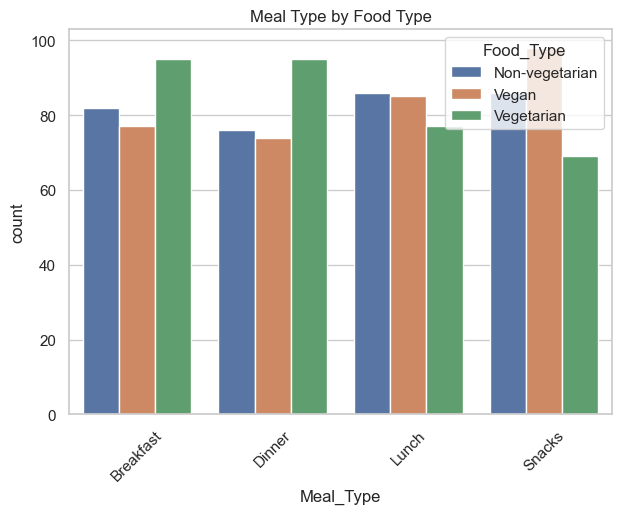

<Figure size 640x480 with 0 Axes>

In [24]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Meal_Type', hue='Food_Type')
plt.title("Meal Type by Food Type")
plt.xticks(rotation=45)
plt.show()
plt.savefig('../reports/Visualizations/Food_Listing/Meal Type by Food Type.png')

## Days to Expiry

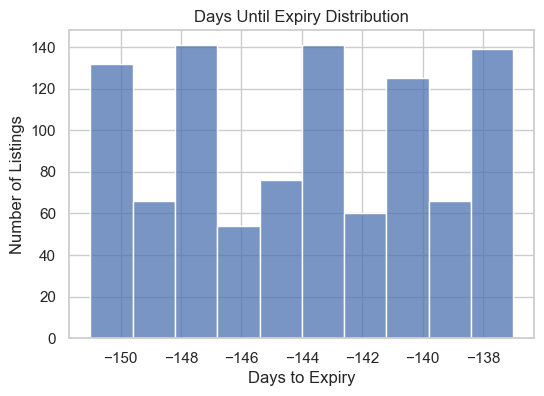

<Figure size 640x480 with 0 Axes>

In [25]:
plt.figure(figsize=(6,4))
sns.histplot(df['Days_To_Expiry'], bins=10, kde=False)
plt.title("Days Until Expiry Distribution")
plt.xlabel("Days to Expiry")
plt.ylabel("Number of Listings")
plt.show()
plt.savefig('../reports/Visualizations/Food_Listing/Days Until Expiry Distribution.png')

# Save cleaned data

In [26]:

df.to_csv("../data/processed/food_listings_data_clean.csv", index=False)
print("\nCleaned and engineered dataset saved as 'food_listings_data_clean.csv'")


Cleaned and engineered dataset saved as 'food_listings_data_clean.csv'
